Primeras predicciones del modelo:
[0 0 0 0 1 0 1 1 0 0]
Primeras clases reales:
[0 0 0 1 0 0 1 0 0 0]
Matriz de Confusión:
[[85 69]
 [75 71]]


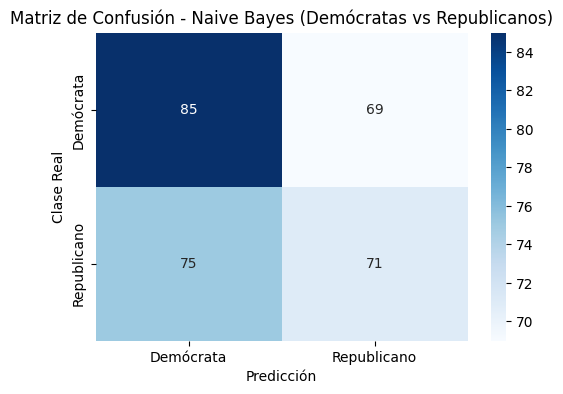

Reporte de Clasificación - Naive Bayes
              precision    recall  f1-score   support

   Demócrata       0.53      0.55      0.54       154
 Republicano       0.51      0.49      0.50       146

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

Votantes clasificados incorrectamente:
     Edad  Ingreso_Anual  Educacion_Posgrado  Educacion_Secundaria  \
660    27            111               False                  True   
411    78            101               False                 False   
513    65             31               False                  True   
76     24            115               False                 False   
636    31             24               False                 False   
..    ...            ...                 ...                   ...   
501    40            121               False                 False   
464    63            141           

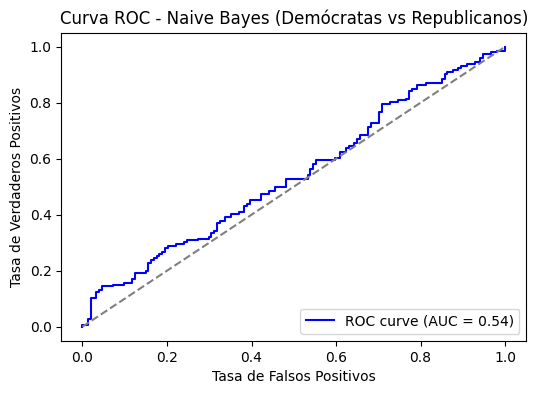

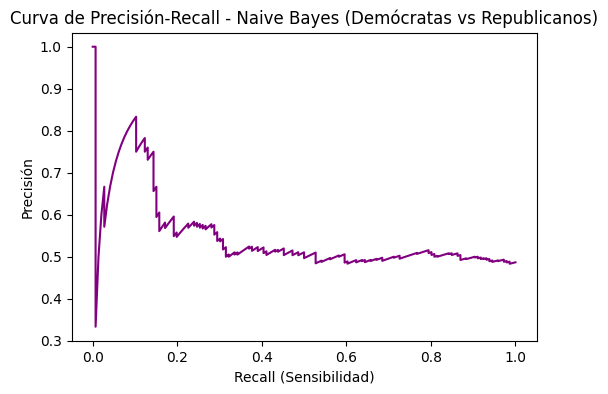

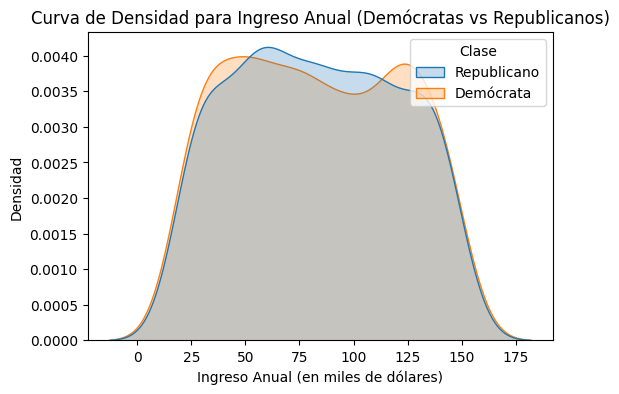

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 1. Preparación de los Datos -------------------------------------------------------

# Generar un conjunto de datos de ejemplo de 1000 votantes
random.seed(42)
np.random.seed(42)
voters = pd.DataFrame({
    'Edad': np.random.randint(18, 80, 1000),
    'Ingreso_Anual': np.random.randint(20, 150, 1000),  # En miles de dólares
    'Educacion': np.random.choice(['Secundaria', 'Licenciatura', 'Posgrado'], 1000),
    'Estado_Civil': np.random.choice(['Casado', 'Soltero'], 1000),
    'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 1000),
    'Clase': np.random.choice(['Demócrata', 'Republicano'], 1000)
})

# Convertir variables categóricas en variables numéricas usando one-hot encoding
voters_encoded = pd.get_dummies(voters, columns=['Educacion', 'Estado_Civil', 'Region'], drop_first=True)

# Dividir el conjunto de datos en entrenamiento y prueba
X = voters_encoded.drop('Clase', axis=1)
y = voters_encoded['Clase'].apply(lambda x: 1 if x == 'Republicano' else 0)  # 1 = Republicano, 0 = Demócrata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Entrenamiento del Modelo -------------------------------------------------------

# Entrenar el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 3. Predicción y Evaluación Inicial ------------------------------------------------

# Realizar predicciones de clase en el conjunto de prueba
y_pred = nb_model.predict(X_test)

# Verificar las primeras predicciones y clases reales
print("Primeras predicciones del modelo:")
print(y_pred[:10])

print("Primeras clases reales:")
print(y_test.values[:10])

# 4. Matriz de Confusión y Métricas de Clasificación --------------------------------

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Demócrata', 'Republicano'], yticklabels=['Demócrata', 'Republicano'])
plt.xlabel('Predicción')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión - Naive Bayes (Demócratas vs Republicanos)')
plt.show()

# Reporte de clasificación (precisión, recall y F1)
print("Reporte de Clasificación - Naive Bayes")
print(classification_report(y_test, y_pred, target_names=['Demócrata', 'Republicano']))

# Identificar y mostrar las predicciones incorrectas
incorrect_predictions = X_test[y_pred != y_test]
print("Votantes clasificados incorrectamente:")
print(incorrect_predictions)

# 5. Evaluación Adicional: Curvas y Métricas ----------------------------------------

# Predicciones de probabilidad para calcular el AUC
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilidad para la clase "Republicano"

# Calcular el AUC (Área bajo la curva ROC) y graficar la curva ROC
auc_score = roc_auc_score(y_test, y_prob)
print(f"Área bajo la curva ROC (AUC) - Naive Bayes: {auc_score:.2f}")
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Naive Bayes (Demócratas vs Republicanos)')
plt.legend(loc="lower right")
plt.show()

# Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall - Naive Bayes (Demócratas vs Republicanos)')
plt.show()

# 6. Análisis de Características ----------------------------------------------------

# Visualización de la distribución de una característica en ambas clases usando seaborn
plt.figure(figsize=(6, 4))
sns.kdeplot(data=voters, x="Ingreso_Anual", hue="Clase", fill=True)
plt.title("Curva de Densidad para Ingreso Anual (Demócratas vs Republicanos)")
plt.xlabel("Ingreso Anual (en miles de dólares)")
plt.ylabel("Densidad")
plt.show()
